In [1]:
import numpy as npp
import minpy.numpy as np
import cPickle
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy('only_numpy')

from SimplePolicyNetwork import SimplePolicyNetwork
from SimpleRLPolicyGradientSolver import SimpleRLPolicyGradientSolver
from simpleBox import simpleBox
from SimRat import SimRat
from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

good_weights/good_weights1
Episode 100 complete (0.11s), loss: -239.087919392, reward: -6, running reward: -6.44711293969
Episode 200 complete (0.11s), loss: -147.528317825, reward: -4, running reward: -4.56899015496
Episode 300 complete (0.11s), loss: -54.5479130976, reward: -2, running reward: -3.51965672293
Episode 400 complete (0.11s), loss: -61.1658724827, reward: -2, running reward: -1.31844629188
Episode 500 complete (0.15s), loss: -296.299380385, reward: -8, running reward: -0.37312931462
Episode 600 complete (0.12s), loss: -1.42108547152e-14, reward: 0, running reward: 1.2215616448
Episode 700 complete (0.13s), loss: 111.526250699, reward: 4, running reward: 4.15429776114
Episode 800 complete (0.11s), loss: 125.419913709, reward: 4, running reward: 9.77436033831
Episode 900 complete (0.13s), loss: 443.72375264, reward: 18, running reward: 15.4578018525
Episode 1000 complete (0.15s), loss: 432.145773037, reward: 18, running reward: 20.1396183329
Episode 1100 complete (0.13s), l

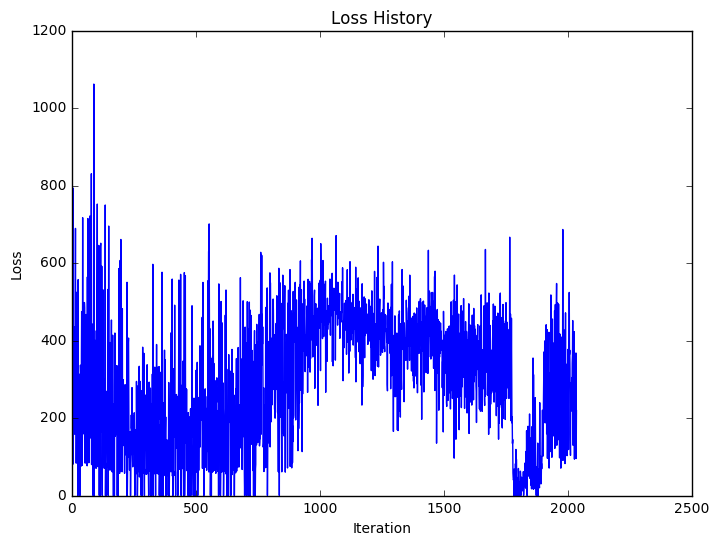

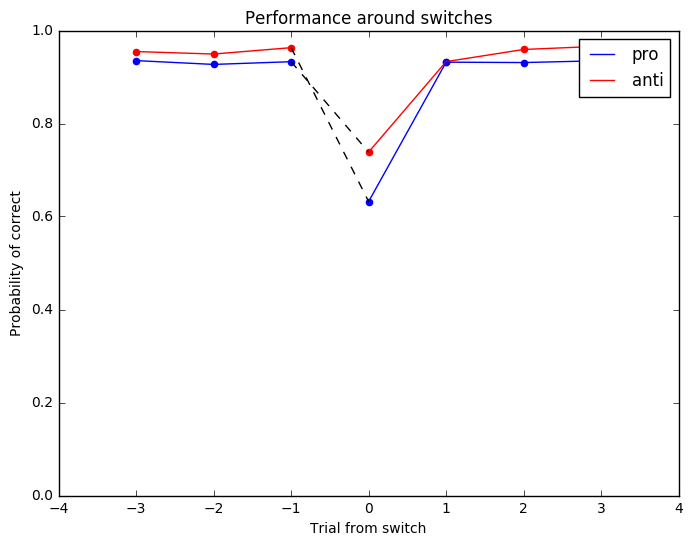

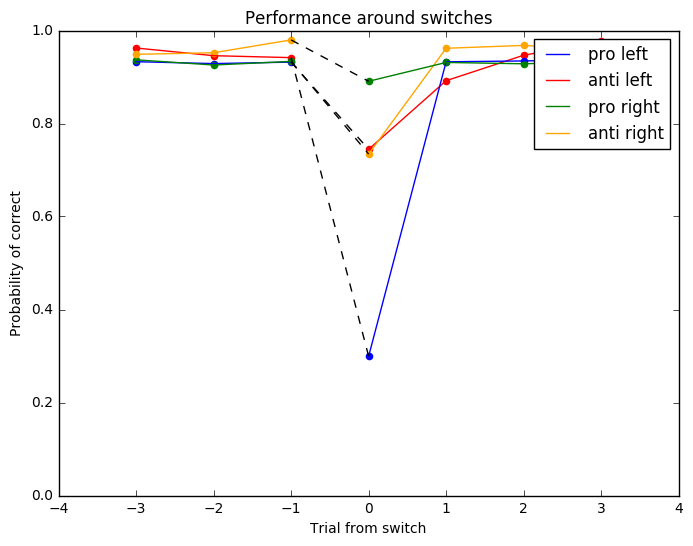

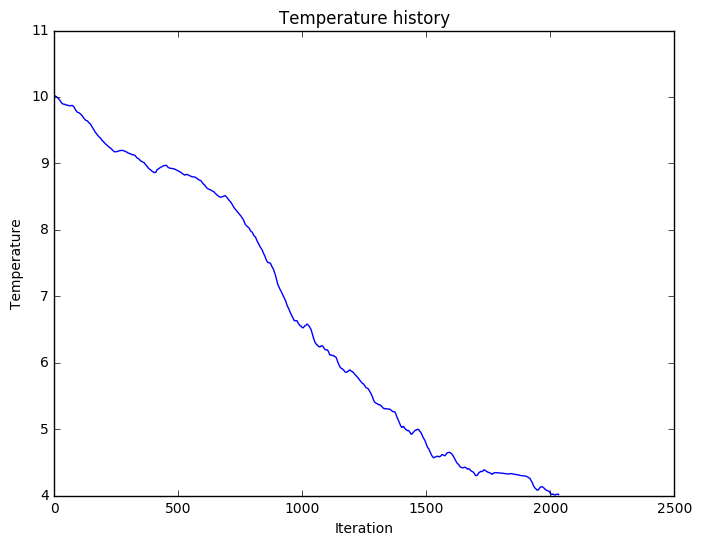

In [2]:
box = simpleBox(mode="alternative",length=1000,block_size=30,random_range=0,trial_per_episode=5, repeat = True)
val_X, val_y = box.X,box.y
rats = {}
solvers = {}
init_parameters = []
i=1
print "good_weights/good_weights"+str(i)
initial_weights = load_weights("good_weights/good_weights"+str(i)+".pkl")

ratname = 'VirtualRat_RL'
model = SimplePolicyNetwork(hidden_dim=10,reg=0, noise_factor = 0)
rat = SimRat(model)
box = simpleBox(mode="switch_ratio",length=10000,block_size=30,random_range=0,
                trial_per_episode=40, repeat = False, reward_ratio = 1, p2a = 1, correction = True)
solver = SimpleRLPolicyGradientSolver(model, box,
                                    update_rule='adam',
                                    optim_config={
                                        'learning_rate': 0.01,
                                        'decay_rate': 1
                                    },
                                    init_rule='xavier',
                                    num_episodes=3001,
                                    verbose=False,
                                    supervised = False,
                                    stop = True,
                                    print_every=100)
solver.init()
solver.set_temperature(10)
#init_param = solver.save_params()
#init_parameters.append(init_param)
solver.load_params(initial_weights)
solver.train()

plt.plot(np.abs(np.array(solver.loss_history)))
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

probs = rat.predict(val_X,val_y)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)
plt.ylim([0,1])
draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)

rats[ratname] = rat
solvers[ratname] = solver
#params[ratname] = init_param
#rat.addHistory(box.output_history())
#rat.computeLearningCurve(50)
plt.plot(solver.temperature_history)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature history')
plt.show()

Episode 100 complete (0.12s), loss: 1113.17523669, reward: -4, running reward: -1.82847154235
Episode 200 complete (0.11s), loss: 815.185847701, reward: 14, running reward: 5.1838467563
Episode 300 complete (0.12s), loss: 252.155657419, reward: 28, running reward: 27.0839708881


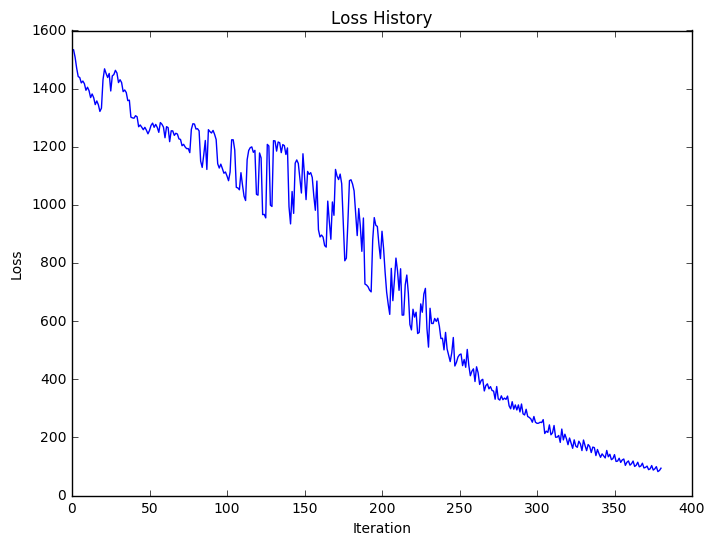

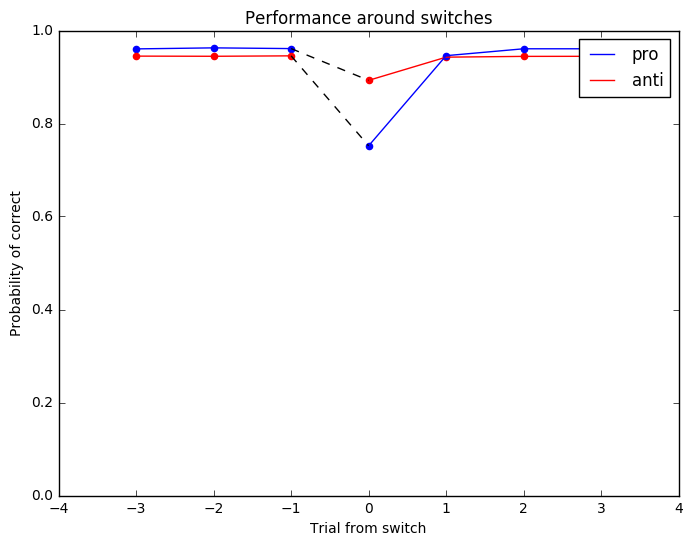

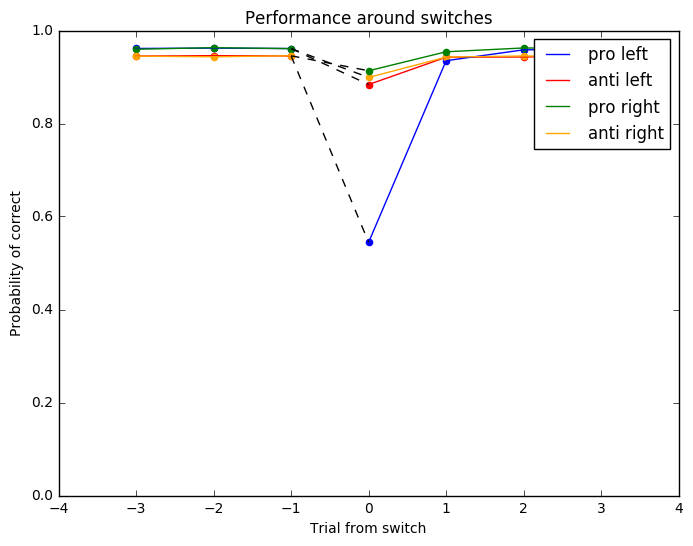

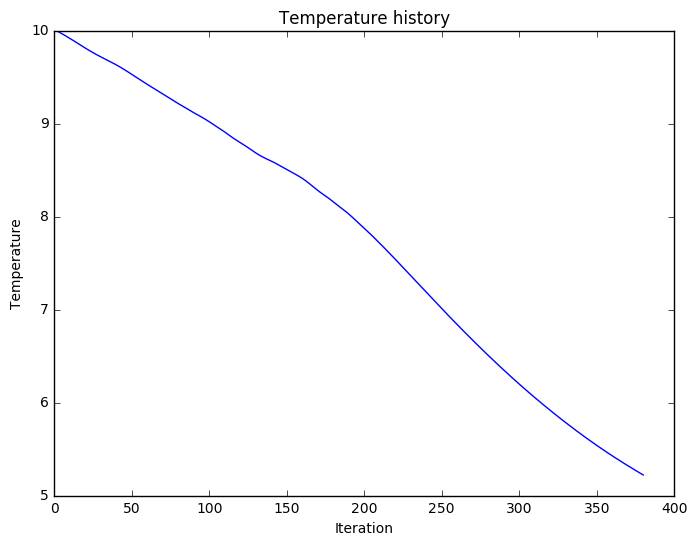

In [3]:
ratname = 'VirtualRat_Supervised'
model = SimplePolicyNetwork(hidden_dim=10,reg=0, noise_factor = 0)
rat = SimRat(model)
box = simpleBox(mode="switch_ratio",length=10000,block_size=30,random_range=0,
                trial_per_episode=40, repeat = False, reward_ratio = 1, p2a = 1, correction = True)
solver = SimpleRLPolicyGradientSolver(model, box,
                                    update_rule='adam',
                                    optim_config={
                                        'learning_rate': 0.01,
                                        'decay_rate': 1
                                    },
                                    init_rule='xavier',
                                    num_episodes=3001,
                                    verbose=False,
                                    supervised = True,
                                    stop = True,
                                    print_every=100)
solver.init()
solver.set_temperature(10)
#init_param = solver.save_params()
#init_parameters.append(init_param)
solver.load_params(initial_weights)
solver.train()

plt.plot(np.abs(np.array(solver.loss_history)))
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show()

probs = rat.predict(val_X,val_y)
trial_window = 3
np.set_printoptions(precision=2)
plt.ylim([0,1])
draw_3d(rat.p2a_prob, rat.a2p_prob, trial_window = 3)
plt.ylim([0,1])
draw_3d_new(rat.p2a_left_prob, rat.p2a_right_prob, rat.a2p_left_prob, rat.a2p_right_prob, trial_window = 3)

rats[ratname] = rat
solvers[ratname] = solver
#params[ratname] = init_param
#rat.addHistory(box.output_history())
#rat.computeLearningCurve(50)
plt.plot(solver.temperature_history)
plt.xlabel('Iteration')
plt.ylabel('Temperature')
plt.title('Temperature history')
plt.show()